In [1]:
#20BCE1858 - NAVYA KALA S V
from IPython.display import Image
%matplotlib inline

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
#Training a perceptron via scikit-learn
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [7]:
help(Perceptron)

Help on class Perceptron in module sklearn.linear_model._perceptron:

class Perceptron(sklearn.linear_model._stochastic_gradient.BaseSGDClassifier)
 |  Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
 |  
 |  Linear perceptron classifier.
 |  
 |  Read more in the :ref:`User Guide <perceptron>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  penalty : {'l2','l1','elasticnet'}, default=None
 |      The penalty (aka regularization term) to be used.
 |  
 |  alpha : float, default=0.0001
 |      Constant that multiplies the regularization term if regularization is
 |      used.
 |  
 |  l1_ratio : float, default=0.15
 |      The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.
 |      `l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.
 |      Only used if 

In [8]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [9]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [10]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

C:\Users\Navyakala SV\AppData\Local\Temp\ipykernel_20840\3584047226.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


IndexError: index 150 is out of bounds for axis 0 with size 150

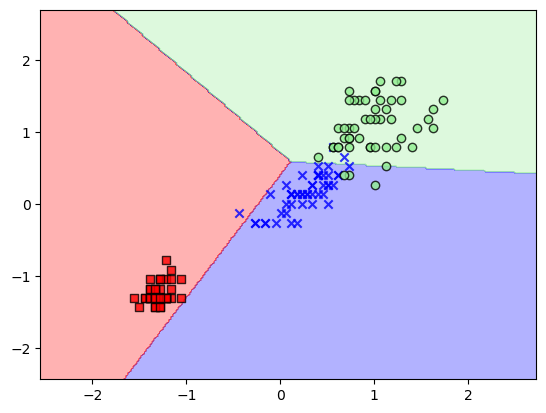

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(0,360))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

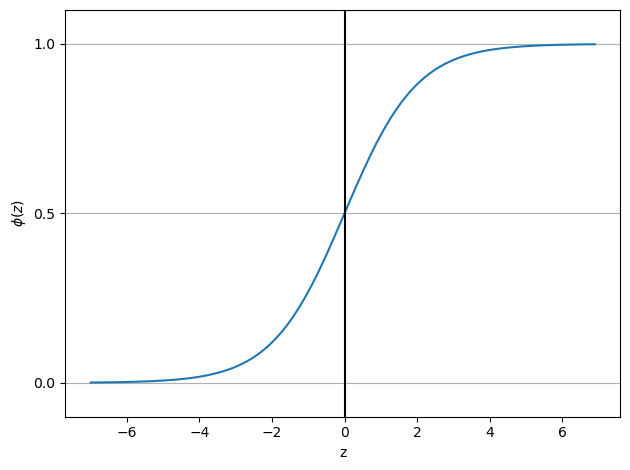

In [13]:
#Logistic regression intuition and conditional probabilities
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

C:\Users\Navyakala SV\AppData\Local\Temp\ipykernel_20840\3584047226.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


IndexError: index 150 is out of bounds for axis 0 with size 150

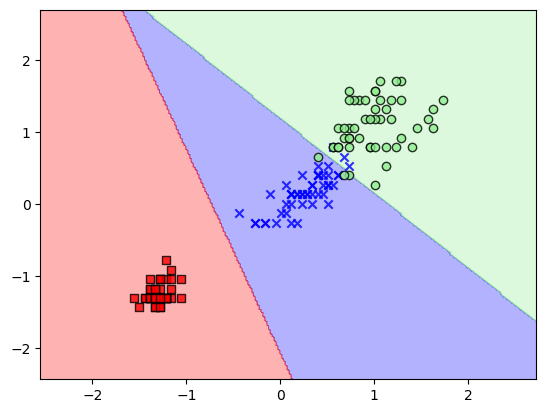

In [14]:
#Training a logistic regression model with scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(0,360))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

In [15]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [16]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [17]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [18]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [19]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

In [20]:
lr.predict(X_test_std)

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [21]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [22]:
import os
from pathlib import Path
import pandas as pd
#getting my datasets
m1 = pd.read_csv("train.csv")
m2 = pd.read_csv("test.csv")
import warnings
warnings.filterwarnings('ignore')

In [23]:
#settings class labels as target 
target=m1["Label"]
print('Class labels:', np.unique(target))

Class labels: [ 0  1  2  3  4  5  6  7 10 11 12 14]


In [24]:
x=m1
y=target

In [25]:
m1["Label"].value_counts()

0     18137
4      1927
10     1275
2      1005
3        83
7        51
11       49
6        43
5        37
12       18
1        16
14        5
Name: Label, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [27]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [18137    16  1005    83  1927    37    43    51     0     0  1275    49
    18     0     5]
Labels count in y_train: [12696    11   703    58  1349    26    30    36     0     0   892    34
    13     0     4]
Labels count in y_test: [5441    5  302   25  578   11   13   15    0    0  383   15    5    0
    1]


In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [29]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [30]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 59


In [31]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.991


In [32]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.991


In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [34]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std,y_combined, classifier=lr, test_idx=range(0,360))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

ValueError: X has 2 features, but LogisticRegression is expecting 80 features as input.

In [35]:
lr.predict_proba(X_test_std[:3, :])

array([[9.99999921e-01, 3.98536962e-09, 2.08535937e-17, 7.20475795e-28,
        8.39845471e-25, 1.66563457e-31, 1.59200119e-18, 1.31215339e-17,
        7.51539378e-08, 8.34554311e-11, 1.90675107e-11, 1.40695413e-23],
       [9.86350224e-43, 1.02439176e-10, 3.33873600e-27, 6.87983732e-22,
        3.51912291e-05, 2.90961903e-19, 3.14151803e-07, 3.23533724e-03,
        1.44679677e-05, 9.96673360e-01, 1.07581417e-05, 3.05715642e-05],
       [9.99991634e-01, 6.61353381e-06, 1.59101071e-21, 1.61639193e-37,
        5.56153036e-39, 1.21224206e-32, 1.07815271e-11, 2.97308387e-18,
        1.72369355e-10, 1.71085119e-08, 1.73477741e-06, 7.27979996e-25]])

In [36]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([0], dtype=int64)

In [37]:
lr.predict(X_test_std)

array([ 0, 11,  0, ...,  0,  0,  0], dtype=int64)

In [38]:
y_test

7026      0
14803    11
5206      0
8151      0
5194      0
         ..
20721     0
3087      0
17092     0
11399     0
62        0
Name: Label, Length: 6794, dtype: int64

In [39]:
lr.intercept_

array([  2.77468461, -35.25517104, -60.9076722 , -43.28533548,
       -55.16772428, -56.78126029, -33.83345185, -42.97744361,
       -27.46973418, -24.14084763, -26.03287557, -48.68269457])

In [40]:
lr.coef_

array([[-1.41178112e-01, -5.30328469e-01,  3.04197912e-01,
         4.15392823e-01, -2.07858664e-01,  8.92647682e-01,
         1.56882776e-01,  5.79998363e-01,  8.74249080e-02,
         1.29683954e-01, -2.04074410e-01,  2.61685995e-01,
        -7.91894912e-02,  2.85463459e-01,  2.74657659e-01,
        -3.45177249e-01,  1.09981109e+00,  4.99007162e-01,
         2.94734796e-01,  1.27286570e-01,  1.98627232e-01,
         3.83123858e-02, -1.12963665e-01,  6.59042775e-03,
        -1.68574284e-01, -3.17416784e-01,  5.35534773e-01,
         1.87323015e-01,  6.88610030e-01,  5.09414122e-01,
        -1.68224870e-01,  2.48548626e-01,  0.00000000e+00,
         1.92256084e-02,  0.00000000e+00, -5.71552129e-02,
        -1.10479237e-01,  1.10007031e+00,  5.59137864e-01,
         7.29201214e-01,  2.78073682e-01,  2.72500592e-01,
         1.76259789e-01, -1.71410033e+00,  2.49375959e-01,
         2.48548626e-01,  1.72382179e-02, -2.24144284e+00,
        -3.02290936e-01, -7.75221768e-01,  1.92256084e-0

In [41]:
lr.predict(X_test)

array([2, 7, 2, ..., 2, 2, 2], dtype=int64)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, lr.predict(X_test))

array([[ 623,    0, 4054,  130,   15,  327,    0,  157,    5,    0,    0,
         130],
       [   0,    0,    5,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,  172,    0,    0,   56,    0,    0,    0,    0,    0,
          74],
       [   8,    0,    0,    0,    0,    0,    0,    4,    0,    0,    0,
          13],
       [ 136,    0,  184,    0,    5,   13,    0,    2,    0,    0,    0,
         238],
       [   2,    0,    1,    0,    0,    8,    0,    0,    0,    0,    0,
           0],
       [   3,    0,    3,    3,    0,    4,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    6,    0,    0,    0,    0,    9,    0,    0,    0,
           0],
       [   6,    0,  375,    2,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    7,    0,    0,    0,    0,    8,    0,    0,    0,
           0],
       [   1,    0,    0,    0,    0,    2,    0,    2,    0,    0,    0,
           0],
       [   0,    0,  